In [1]:
%run setup.ipynb

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [3]:
df = pd.read_csv(f'{RESULTS_PATH}/user_support3_3.csv')

In [5]:
tf_idf_matrix = pd.read_csv(f'{RESULTS_PATH}/tf_idf_matrix_DF.csv')

## TF-IDF MODELS

In [6]:
X_tfidf = tf_idf_matrix
labels = df["label"]

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, 
                        labels, test_size=0.2, random_state=42, 
                        stratify=labels)

In [8]:
# Define classifiers
nb = MultinomialNB()
svm = SVC()

# Train phase
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

Classification report for MultinomialNB:
              precision    recall  f1-score   support

CNAF farming       0.90      0.98      0.93       285
    CNAF net       0.93      0.41      0.57        32
CNAF storage       0.86      0.82      0.84       146
       sysop       0.97      0.97      0.97       279

    accuracy                           0.92       742
   macro avg       0.91      0.79      0.83       742
weighted avg       0.92      0.92      0.91       742



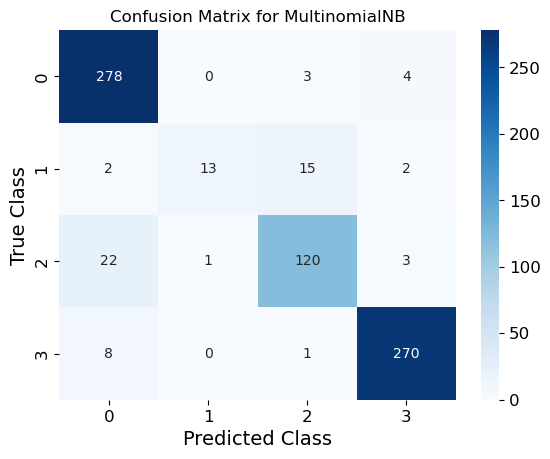

Classification report for SVC:
              precision    recall  f1-score   support

CNAF farming       0.93      0.99      0.96       285
    CNAF net       0.86      0.56      0.68        32
CNAF storage       0.92      0.90      0.91       146
       sysop       1.00      0.99      0.99       279

    accuracy                           0.95       742
   macro avg       0.93      0.86      0.89       742
weighted avg       0.95      0.95      0.95       742



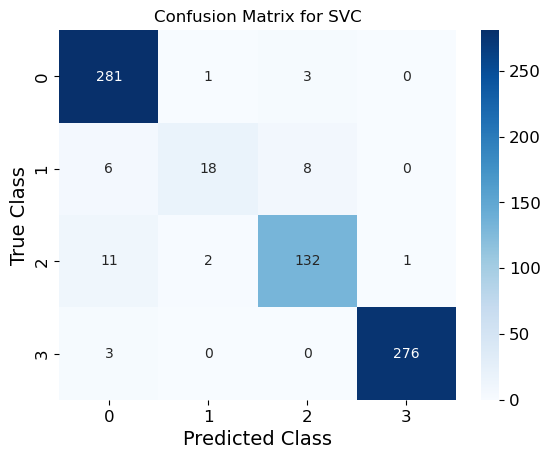

In [9]:
#NB and SVM models
models = [nb, svm]
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"Classification report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

In [10]:
# KNN needs this data structure
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

In [11]:
# KNN models
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print(f"Confusion matrix for KNN with K = {i}:\n")
    #print(confusion_matrix(y_test, y_pred))
    #print(f"Classification report for KNN with K = {i}:\n")
    #print(classification_report(y_test, y_pred))
    #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
    #plt.title(f"Confusion Matrix for KNN with K = {i}:\n")
    #plt.xlabel("Predicted Class")
    #plt.ylabel("True Class")
    #plt.show()

In [12]:
# Comparison of the accuracy of the 10 KNN models (TF-IDF)
from tabulate import tabulate
table1 = [['K', '1', '2', '3','4','5','6','7','8','9','10'],
          ['Accuracy', '0.91', '0.90', '0.93','0.92','0.92','0.91','0.90','0.91','0.91','0.90']]

print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤══════╤═════╤══════╤══════╤══════╤══════╤═════╤══════╤══════╤══════╕
│ K        │    1 │   2 │    3 │    4 │    5 │    6 │   7 │    8 │    9 │   10 │
╞══════════╪══════╪═════╪══════╪══════╪══════╪══════╪═════╪══════╪══════╪══════╡
│ Accuracy │ 0.91 │ 0.9 │ 0.93 │ 0.92 │ 0.92 │ 0.91 │ 0.9 │ 0.91 │ 0.91 │  0.9 │
╘══════════╧══════╧═════╧══════╧══════╧══════╧══════╧═════╧══════╧══════╧══════╛


Classification report for KNN with K = 3:

              precision    recall  f1-score   support

CNAF farming       0.96      0.93      0.94       285
    CNAF net       0.80      0.62      0.70        32
CNAF storage       0.81      0.92      0.86       146
       sysop       0.99      0.97      0.98       279

    accuracy                           0.93       742
   macro avg       0.89      0.86      0.87       742
weighted avg       0.93      0.93      0.93       742



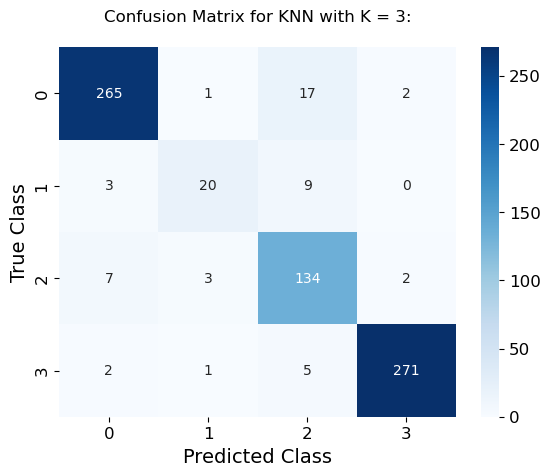

In [13]:
#k=3
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Classification report for KNN with K = {3}:\n")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
plt.title(f"Confusion Matrix for KNN with K = {3}:\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## WORD2VEC MODELS

In [13]:
df_w2v = pd.read_csv(f'{RESULTS_PATH}/user_support4_3.csv')

In [15]:
X_w2v = pd.read_csv(f'{RESULTS_PATH}/X.csv')

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X_w2v)
X_scaled

array([[0.74030675, 0.21354594, 0.73024236, ..., 0.5149761 , 0.30224812,
        0.45423905],
       [0.61295098, 0.54060271, 0.62972591, ..., 0.51987339, 0.64441286,
        0.39392   ],
       [0.58555954, 0.9131763 , 0.41574437, ..., 0.25099453, 0.86078414,
        0.39450507],
       ...,
       [0.65337495, 0.48223809, 0.57948668, ..., 0.35495751, 0.42348854,
        0.47440364],
       [0.73718964, 0.45430956, 0.62128396, ..., 0.11243684, 0.32241921,
        0.56143844],
       [0.64494865, 0.39738344, 0.57547981, ..., 0.24970192, 0.31993802,
        0.5541484 ]])

In [17]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                        labels, test_size=0.2, random_state=1, 
                        stratify=labels)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2967, 50) (742, 50) (2967,) (742,)


In [18]:
# Training phase
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

Classification report for MultinomialNB:
              precision    recall  f1-score   support

CNAF farming       0.57      0.94      0.71       285
    CNAF net       0.00      0.00      0.00        32
CNAF storage       0.00      0.00      0.00       146
       sysop       0.89      0.85      0.87       279

    accuracy                           0.68       742
   macro avg       0.36      0.45      0.39       742
weighted avg       0.55      0.68      0.60       742



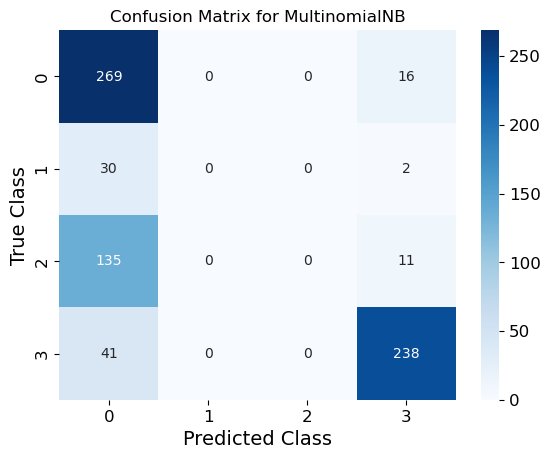

Classification report for SVC:
              precision    recall  f1-score   support

CNAF farming       0.91      0.95      0.93       285
    CNAF net       0.72      0.56      0.63        32
CNAF storage       0.87      0.82      0.85       146
       sysop       0.98      0.98      0.98       279

    accuracy                           0.92       742
   macro avg       0.87      0.83      0.85       742
weighted avg       0.92      0.92      0.92       742



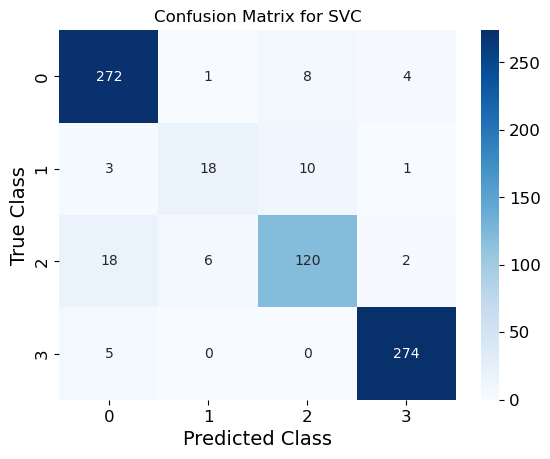

In [19]:
# NB and SVM models
models = [nb, svm]
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"Classification report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

In [20]:
# KNN models
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print(f"Confusion matrix for KNN with K = {i}:\n")
    #print(confusion_matrix(y_test, y_pred))
    #print(f"Classification report for KNN with K = {i}:\n")
    #print(classification_report(y_test, y_pred))
    #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
    #plt.title(f"Confusion Matrix for KNN with K = {i}:\n")
    #plt.xlabel("Predicted Class")
    #plt.ylabel("True Class")
    #plt.show()

In [23]:
# Comparison of the accuracy of the 10 KNN models (WORD2VEC)
table1 = [['K', '1', '2', '3','4','5','6','7','8','9','10'],
          ['Accuracy', '0.94', '0.92', '0.92','0.91','0.91','0.92','0.91','0.91','0.91','0.91']]
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ K        │    1 │    2 │    3 │    4 │    5 │    6 │    7 │    8 │    9 │   10 │
╞══════════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ Accuracy │ 0.94 │ 0.92 │ 0.92 │ 0.91 │ 0.91 │ 0.92 │ 0.91 │ 0.91 │ 0.91 │ 0.91 │
╘══════════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛


We chose k=3 rather than k=1 to avoid having a model too sensitive to noise in the data.

Classification report for KNN with K = 3:

              precision    recall  f1-score   support

CNAF farming       0.90      0.96      0.93       285
    CNAF net       0.73      0.59      0.66        32
CNAF storage       0.89      0.79      0.84       146
       sysop       0.97      0.98      0.97       279

    accuracy                           0.92       742
   macro avg       0.87      0.83      0.85       742
weighted avg       0.92      0.92      0.92       742



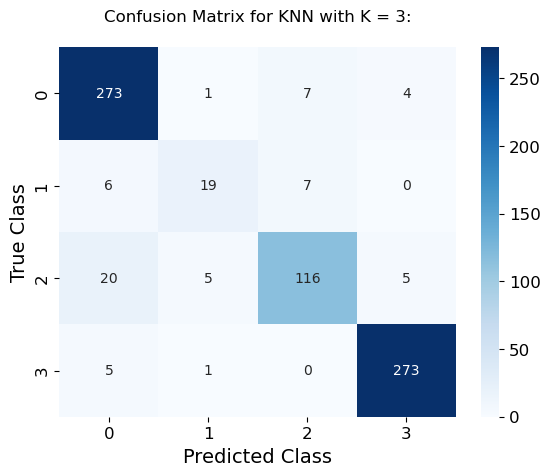

In [24]:
#k=3
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Classification report for KNN with K = {3}:\n")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",fmt='d')
plt.title(f"Confusion Matrix for KNN with K = {3}:\n")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()